In [52]:
import matplotlib.pyplot as plt
import pandas as pd

import spotify
import utils

sp = spotify.login(scope='playlist-modify-private')
user = sp.current_user()
username = user['id']
displayName = user['display_name']
displayName

'Mehmet Birgi'

In [53]:
# get all my playlists 
response = sp.current_user_playlists()
all_playlists = response['items']
while response['next']:
    response = sp.next(response)
    all_playlists.extend(response['items'])
len(all_playlists)

77

In [54]:
# save the playlists as a list of dictionaries
import json
import os
dir = 'scrapes'
if not os.path.exists(dir):
    os.mkdir(dir)
with open(os.path.join('scrapes', f'all_my_playlists.json'), 'w', encoding='utf-8') as f:
    json.dump(all_playlists, f, ensure_ascii=False, indent=4)

In [55]:
df = pd.DataFrame(
    {
        'id': [playlist['id'] for playlist in all_playlists],
        'name': [playlist['name'] for playlist in all_playlists],
        'total_tracks': [playlist['tracks']['total'] for playlist in all_playlists],
    }
)
df

,id,name,total_tracks
0,4qVqA3a4wngiKBVYG5kvxe,Run Test BPM 125 - 130,287
1,08CVuk5TKfBivxwWz0zu1X,Vocal Jazz,25
2,5CHWpuBziG2TlEEYyQR0cF,Run (120-130 BPM),42
3,1BfmdmBfylz9Xb9vo7FDNS,Run Test BPM 120 - 130,613
4,31ncBxcoGHB9lTbAEly5xR,OpenBroadcast - Good Vibes (by baxter),462
...,...,...,...
72,69YjiqBUyv672XV0n1RQrv,Top bebop tracks,100
73,0Ou5HSpnMa1Sc9uZZjnOOa,The Vibe!,123
74,7pUXPo3ScNlpk4npAdXfg4,BeBop Deluxe,20
75,4hjFTpYbSioqRtPy53W7U8,Funky Stuff,15


In [56]:
selection = [
    '31ncBxcoGHB9lTbAEly5xR',
    '2CeBVMJ2bgXjtcqFiN2ncB',
    '2J7C570IoHMn1zccjQMF2Q',
    '7taG2mm7i5ng9FTSYGXXgG',
    '0vay9gW8AcsmEycNCh8pnz',
    '7JYdgqlBBhiCqjpx2pVKwf',
    '2MzQi9D9OtFuUsuOS8lwtS',
    '5ngdqzXvg3v6yakZ6oAcxv',
    '566s1zzyRtF4bzv9JfpnVY',
    '6RxsseYlyxrkJOOmAOLQTM',
    '37i9dQZF1DWSKpvyAAcaNZ',
    '37i9dQZF1DWV5vqkTng2MA',
    '37i9dQZF1DWSXWSaQmvWOB',
    '0Ou5HSpnMa1Sc9uZZjnOOa'
]
list(df[df['id'].isin(selection)]['name'])

['OpenBroadcast - Good Vibes (by baxter)',
 'What It Is!: Funky Soul And Rare Grooves',
 'OpenBroadcast - Cool Sessions (by blundetto)',
 'Lounge',
 'Groove Machine',
 'KJAH',
 'Power Songs',
 'Trojan Archives',
 'Pop2000',
 'Rolling Stone 500 Greatest Songs of All Time (2004)',
 'Blues & Roots Rock',
 'The New Retro',
 "Soul 'n' the City",
 'The Vibe!']

In [57]:
all_tracks = [t['track'] for t in spotify.get_tracks_in_playlists(sp, selection)]
len(all_tracks)

6968

In [59]:
unique_tracks_raw = list({v['id']:v for v in all_tracks}.values())
len(unique_tracks_raw)

6409

In [60]:
unique_tracks_raw[0]

{'album': {'album_type': 'album',
  'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/1bXvCJUlFp4OJi89vZnNVI'},
    'href': 'https://api.spotify.com/v1/artists/1bXvCJUlFp4OJi89vZnNVI',
    'id': '1bXvCJUlFp4OJi89vZnNVI',
    'name': 'John Milk',
    'type': 'artist',
    'uri': 'spotify:artist:1bXvCJUlFp4OJi89vZnNVI'}],
  'available_markets': ['AD',
   'AE',
   'AR',
   'AT',
   'AU',
   'BG',
   'BH',
   'BO',
   'BR',
   'CA',
   'CH',
   'CL',
   'CO',
   'CR',
   'CY',
   'CZ',
   'DK',
   'DO',
   'DZ',
   'EC',
   'EE',
   'EG',
   'FI',
   'FR',
   'GB',
   'GR',
   'GT',
   'HK',
   'HN',
   'HU',
   'ID',
   'IE',
   'IL',
   'IN',
   'IS',
   'JO',
   'KW',
   'LB',
   'LI',
   'LT',
   'LV',
   'MA',
   'MC',
   'MT',
   'MX',
   'MY',
   'NI',
   'NO',
   'NZ',
   'OM',
   'PA',
   'PE',
   'PH',
   'PL',
   'PS',
   'PT',
   'PY',
   'QA',
   'RO',
   'SA',
   'SE',
   'SG',
   'SK',
   'SV',
   'TH',
   'TN',
   'TR',
   'TW',
   'US',
   'UY',
  

In [69]:
unique_tracks = []
for track in unique_tracks_raw:
    unique_tracks.append({
        'name': track['name'],
        'artist': track['artists'][0]['name'],
        'id': track['id'],
        'popularity': track['popularity']
    })

In [70]:
unique_tracks[0]

{'name': 'Dirty Funk',
 'artist': 'John Milk',
 'id': '6e49wc8HXduWnzYcz6a7aO',
 'popularity': 5}

In [71]:
df_unique_tracks = pd.DataFrame(unique_tracks)[['name', 'artist', 'id', 'popularity']]
df_unique_tracks

,name,artist,id,popularity
0,Dirty Funk,John Milk,6e49wc8HXduWnzYcz6a7aO,5
1,Chica,Philippe Baden Powell,4sglxbQGHLEyrHMmQUhsMj,3
2,O Caminho Do Bem,Tim Maia,20vupKwM82QPa58MqGmF9J,41
3,Kalinka,Jo Privat,7htb0h3t1No5P6rN0q2HXR,14
4,Bis,Arthur Verocai,4QPoCJSGDSig70rrzt8ZLi,22
...,...,...,...,...
6404,Salt Chase,Zulema,1OvN3WLrTFkwvnRWmyq9mI,0
6405,Filodiffusione,Armando Trovajoli,7h61UXIa1LTE1rT9juSD0u,0
6406,Running Away from Jerzy,Franco Micalizzi,5a69nN0CDAUghiNvOmHPbW,0
6407,Our Man Flint - From the 20th Century-Fox film...,Hugo Montenegro,43bLYaRoHtz8zEBsENDJBY,0


In [72]:
track_ids = list(df_unique_tracks['id'])
len(track_ids)

6409

In [73]:
tracks_audio_features = spotify.get_audio_features_for_tracks(sp, track_ids)
len(tracks_audio_features)

6409

In [75]:
df_audio_features = pd.DataFrame(tracks_audio_features).drop(columns=['type', 'uri', 'track_href', 'analysis_url'])
df_audio_features

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms,time_signature
0,0.875,0.449,2,-14.864,0,0.0607,0.1270,0.361000,0.0621,0.934,100.481,6e49wc8HXduWnzYcz6a7aO,173268,4
1,0.656,0.472,0,-10.657,0,0.0434,0.2500,0.026200,0.1030,0.512,113.950,4sglxbQGHLEyrHMmQUhsMj,199680,4
2,0.812,0.416,9,-10.998,0,0.0642,0.2680,0.097800,0.1150,0.893,107.993,20vupKwM82QPa58MqGmF9J,366187,4
3,0.478,0.361,4,-12.471,1,0.0750,0.5100,0.252000,0.0435,0.924,205.408,7htb0h3t1No5P6rN0q2HXR,155217,4
4,0.645,0.867,2,-7.729,1,0.0567,0.5460,0.000432,0.3270,0.855,100.521,4QPoCJSGDSig70rrzt8ZLi,238200,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6404,0.543,0.805,9,-7.673,0,0.0582,0.2140,0.070200,0.3230,0.747,98.442,1OvN3WLrTFkwvnRWmyq9mI,203320,3
6405,0.742,0.759,5,-13.110,1,0.0351,0.0258,0.018600,0.0763,0.972,99.870,7h61UXIa1LTE1rT9juSD0u,158587,4
6406,0.602,0.966,10,-8.041,1,0.0579,0.0445,0.002540,0.2260,0.803,104.427,5a69nN0CDAUghiNvOmHPbW,208600,4
6407,0.377,0.726,0,-7.004,1,0.0418,0.0662,0.311000,0.3970,0.569,130.353,43bLYaRoHtz8zEBsENDJBY,140720,4


In [76]:
df_tracks = pd.merge(df_unique_tracks, df_audio_features, how='inner', on='id')
df_tracks

,name,artist,id,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,Dirty Funk,John Milk,6e49wc8HXduWnzYcz6a7aO,5,0.875,0.449,2,-14.864,0,0.0607,0.1270,0.361000,0.0621,0.934,100.481,173268,4
1,Chica,Philippe Baden Powell,4sglxbQGHLEyrHMmQUhsMj,3,0.656,0.472,0,-10.657,0,0.0434,0.2500,0.026200,0.1030,0.512,113.950,199680,4
2,O Caminho Do Bem,Tim Maia,20vupKwM82QPa58MqGmF9J,41,0.812,0.416,9,-10.998,0,0.0642,0.2680,0.097800,0.1150,0.893,107.993,366187,4
3,Kalinka,Jo Privat,7htb0h3t1No5P6rN0q2HXR,14,0.478,0.361,4,-12.471,1,0.0750,0.5100,0.252000,0.0435,0.924,205.408,155217,4
4,Bis,Arthur Verocai,4QPoCJSGDSig70rrzt8ZLi,22,0.645,0.867,2,-7.729,1,0.0567,0.5460,0.000432,0.3270,0.855,100.521,238200,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6404,Salt Chase,Zulema,1OvN3WLrTFkwvnRWmyq9mI,0,0.543,0.805,9,-7.673,0,0.0582,0.2140,0.070200,0.3230,0.747,98.442,203320,3
6405,Filodiffusione,Armando Trovajoli,7h61UXIa1LTE1rT9juSD0u,0,0.742,0.759,5,-13.110,1,0.0351,0.0258,0.018600,0.0763,0.972,99.870,158587,4
6406,Running Away from Jerzy,Franco Micalizzi,5a69nN0CDAUghiNvOmHPbW,0,0.602,0.966,10,-8.041,1,0.0579,0.0445,0.002540,0.2260,0.803,104.427,208600,4
6407,Our Man Flint - From the 20th Century-Fox film...,Hugo Montenegro,43bLYaRoHtz8zEBsENDJBY,0,0.377,0.726,0,-7.004,1,0.0418,0.0662,0.311000,0.3970,0.569,130.353,140720,4


In [80]:
# save tracks
import json
import os
dir = 'scrapes'
if not os.path.exists(dir):
    os.mkdir(dir)
with open(os.path.join('scrapes', 'runnable_tracks.json'), 'w', encoding='utf-8') as f:
    df_tracks.to_json(path_or_buf=f, orient='records', indent=4)

In [82]:
# read the file
import json
import os
with open(os.path.join('scrapes', 'runnable_tracks.json'), 'r', encoding='utf-8') as f:
    tracks = json.load(f)
len(tracks)

6409

In [84]:
df_tracks = pd.DataFrame(tracks)

##### select the suitable tracks:

In [86]:
tempo_min, tempo_max = 125, 130
track_ids = list(df_tracks[
    (df_tracks['tempo'] >= tempo_min) & 
    (df_tracks['tempo'] <= tempo_max) & 
    (df_tracks['danceability'] >= 0.8) &
    (df_tracks['time_signature'] == 4) &
    (df_tracks['liveness'] <= 0.4) &
    (df_tracks['speechiness'] <= 0.33)
]['id'])
len(track_ids)

111

In [87]:
playlist_id, is_new = spotify.get_playlist_by_name(sp, 
        f"Run Test BPM {tempo_min} - {tempo_max}", 
        create_if_none=True)
if playlist_id and is_new:
    print(f"Created new playlist with ID {playlist_id}")
elif playlist_id:
    print(f"Found existing playlist with ID {playlist_id}")
else:
    print("Something went wrong :-(")

Created new playlist with ID 27p0ZTqBDtJSLySMNKd5HW


In [88]:
# get existing tracks:
results = sp.playlist_tracks(playlist_id)     # TODO: get only IDs ('fields' filter)
existing_tracks = results['items']
while results['next']:
    results = sp.next(results)
    existing_tracks.extend(results['items'])
existing_track_ids = [item['track']['id'] for item in existing_tracks]
# print(f"Existing tracks: {existing_track_ids}")
skip_duplicates = True
if skip_duplicates:
    new_track_ids = [track_id for track_id in track_ids if track_id not in existing_track_ids]
else:
    new_track_ids = track_ids
user_id = sp.current_user()['id']
# print(f"Tracks to be added: {new_track_ids}")
if new_track_ids:
    max_ids = 100
    for i in range(0, len(new_track_ids), max_ids):
        sp.user_playlist_add_tracks(user_id, playlist_id, new_track_ids[i:i+max_ids])
len(new_track_ids)

111

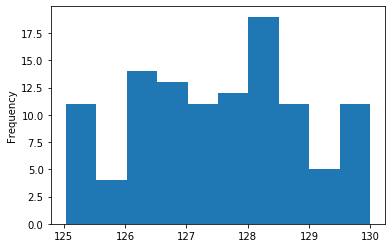

In [89]:
max_ids = 50
tracks_audio_features = []
for i in range(0, len(track_ids), max_ids):
    results = sp.audio_features(track_ids[i:i+max_ids])
    tracks_audio_features.extend(results)
len(tracks_audio_features)
df_audio_features = pd.DataFrame(tracks_audio_features)
df_tracks = pd.merge(df_unique_tracks, df_audio_features, how='inner', on='id')

df_tracks['tempo'].plot.hist()

# Get all my public playlists

In [7]:
sp_response = sp.current_user_playlists()
all_playlists = sp_response['items']
while sp_response['next']:
    sp_response = sp.next(sp_response)
    all_playlists.extend(sp_response['items'])
len(all_playlists)

73

In [8]:
own_playlists = list(filter(lambda l: l['owner']['id'] == user['id'], all_playlists))
len(own_playlists)

49

In [9]:
own_playlists_trimmed = [{k: v for k, v in d.items() if k in ['id', 'name', 'public', 'tracks']} for d in own_playlists]
len(own_playlists_trimmed)

49

In [10]:
public_playlists = list(filter(lambda l: (l['public'] == True), own_playlists_trimmed))
len(public_playlists)

17

In [11]:
public_playlists

[{'id': '6u5RL72VpPaJfeLksVLE2Q',
  'name': 'Mellow Jazz',
  'public': True,
  'tracks': {'href': 'https://api.spotify.com/v1/playlists/6u5RL72VpPaJfeLksVLE2Q/tracks',
   'total': 712}},
 {'id': '7JYdgqlBBhiCqjpx2pVKwf',
  'name': 'KJAH',
  'public': True,
  'tracks': {'href': 'https://api.spotify.com/v1/playlists/7JYdgqlBBhiCqjpx2pVKwf/tracks',
   'total': 1610}},
 {'id': '4jdHBhEw9a9OBJ0CVbmpFX',
  'name': 'Run',
  'public': True,
  'tracks': {'href': 'https://api.spotify.com/v1/playlists/4jdHBhEw9a9OBJ0CVbmpFX/tracks',
   'total': 68}},
 {'id': '2MzQi9D9OtFuUsuOS8lwtS',
  'name': 'Power Songs',
  'public': True,
  'tracks': {'href': 'https://api.spotify.com/v1/playlists/2MzQi9D9OtFuUsuOS8lwtS/tracks',
   'total': 925}},
 {'id': '5ngdqzXvg3v6yakZ6oAcxv',
  'name': 'Trojan Archives',
  'public': True,
  'tracks': {'href': 'https://api.spotify.com/v1/playlists/5ngdqzXvg3v6yakZ6oAcxv/tracks',
   'total': 749}},
 {'id': '566s1zzyRtF4bzv9JfpnVY',
  'name': 'Pop2000',
  'public': True,
  '